Install

In [39]:
pip install tensorflow matplotlib scikit-learn seaborn


Import Libraries

In [41]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


Directories and Image Parameter

In [42]:
base_dir = r"C:\Users\ACER\OneDrive\Documents\EVENT DRIVEN PROGRAMMING\New folder\Dataset"

In [45]:
train_data_dir = 'Dataset/Train'
validation_data_dir = 'Dataset/Validation'
test_data_dir = 'Dataset/Test'
img_width, img_height = 224, 224
batch_size = 16


Data Generators

In [47]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)


Prepare Data

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 416 images belonging to 4 classes.
Found 92 images belonging to 4 classes.
Found 90 images belonging to 4 classes.


Define Model

In [49]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])


c:\Users\ACER\OneDrive\Documents\EVENT DRIVEN PROGRAMMING\answer\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile

In [50]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Checkpoint

In [52]:
checkpoint = ModelCheckpoint('my_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')


Train

In [53]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=50,
    callbacks=[checkpoint]
)


c:\Users\ACER\OneDrive\Documents\EVENT DRIVEN PROGRAMMING\answer\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 16s 497ms/step - accuracy: 0.3284 - loss: 1.2975 - val_accuracy: 0.3500 - val_loss: 1.2411
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.3667 - loss: 1.1983 - val_accuracy: 0.7000 - val_loss: 1.1762
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 25s 974ms/step - accuracy: 0.6035 - loss: 1.0714 - val_accuracy: 0.7000 - val_loss: 0.7930
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 17s 611ms/step - accuracy: 0.6728 - loss: 0.7691 - val_accuracy: 0.6750 - val_loss: 0.7886
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.7185 - loss: 0.6255 - val_accuracy: 0.6875 - val_loss: 0.7843
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 0.6692 - loss: 0.7397 - val_accuracy: 0.7875 - val_loss: 0.6561
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 422ms/step - accuracy: 0.7764 - loss: 0.6240 - val_accuracy: 0.7000 - val_loss: 0.5481
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.7770 - loss: 0.5107 - val_accu

Save Model

In [54]:
model.save('my_model.keras')


Evaluate

In [55]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.6371 - loss: 0.6537
Test accuracy: 0.800000011920929


Plot Training and Validation Accuracy

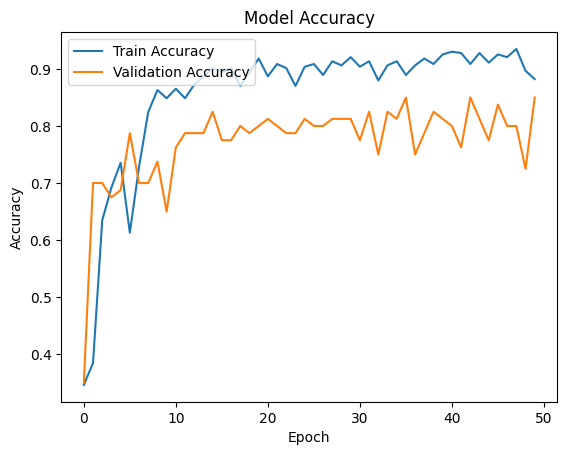

In [56]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Plot Training and Validation Loss

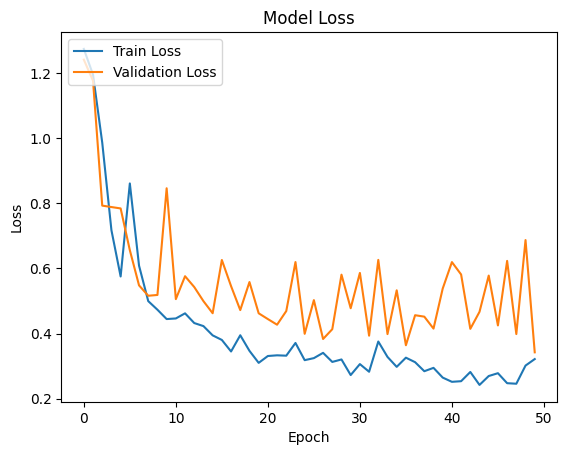

In [57]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Visuals

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


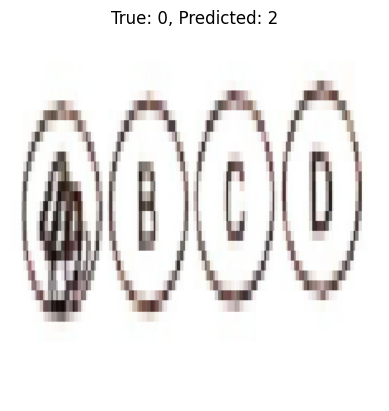

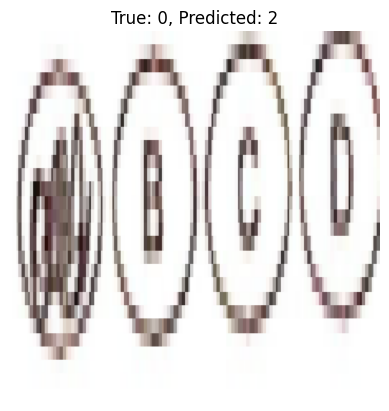

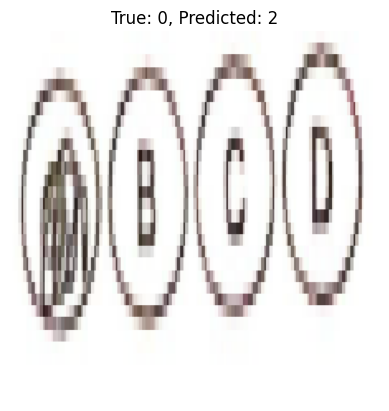

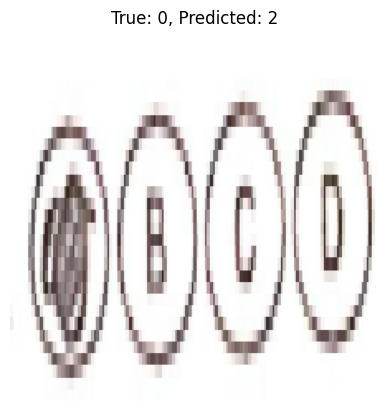

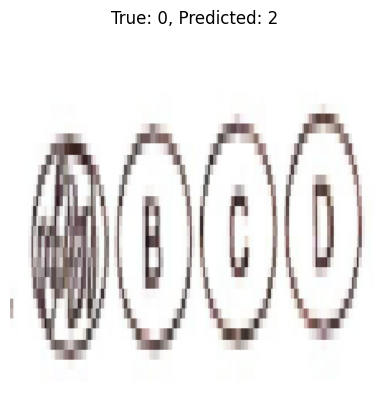

In [58]:
x_test, y_test = next(test_generator)

# Make predictions
predictions = model.predict(x_test)

# Plot the images along with the predicted and true labels
for i in range(5):  # Display 5 images
    plt.imshow(x_test[i])
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()


Confusion Matrix

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step


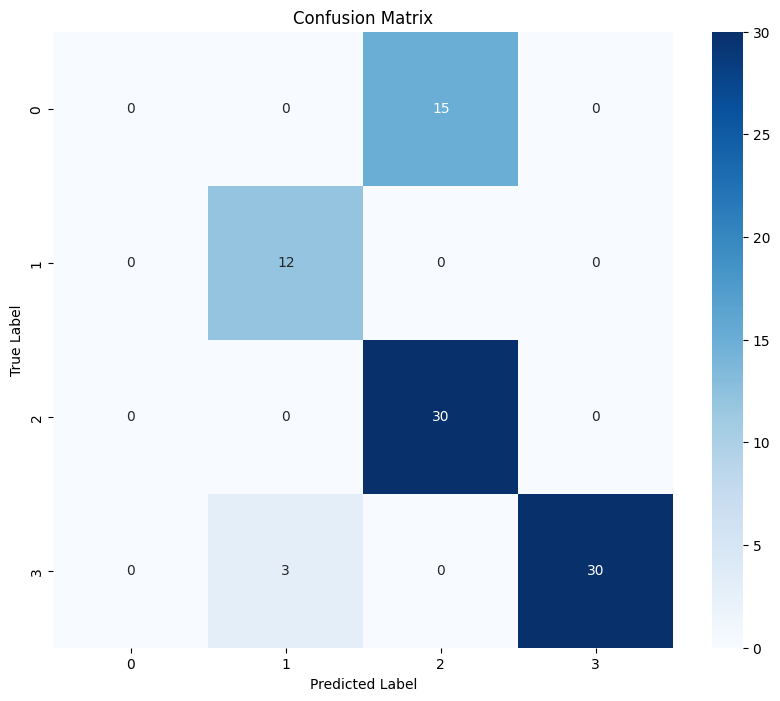

In [60]:
# Cell 14: Confusion Matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
